In [55]:
import sys, numpy as np, healpy as hp, curvedsky as cs, pickle as pl, os
sys.path.append('../')
from matplotlib.pyplot import *
from utils import camb_clfile,timing,hash_array

In [2]:
cl_unl = camb_clfile("/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CAMB/BBSims_lenspotential.dat")

In [3]:
%load_ext autoreload
%autoreload 2
import quest 

In [14]:
clpp = quest.RecoBase.from_ini('litebirdFG1_tn.ini')

In [15]:
QU = pl.load(open(clpp.exp_sim_dir+clpp.exp_sim_pre+str(1).zfill(4)+'.pkl','rb'))

In [18]:
fElm, fBlm = cs.utils.hp_map2alm_spin(clpp.nside,clpp.lmax,clpp.lmax,2,QU[0],QU[1])

In [19]:
qu = pl.load(open(clpp.exp_sim_dir+'../MAP_noFG/'+clpp.exp_sim_pre+str(1).zfill(4)+'.pkl','rb'))

In [20]:
felm, fblm = cs.utils.hp_map2alm_spin(clpp.nside,clpp.lmax,clpp.lmax,2,qu[0],qu[1])

In [39]:
fBmap = cs.utils.hp_alm2map(clpp.nside,clpp.lmax,clpp.lmax,fBlm)
fbmap = cs.utils.hp_alm2map(clpp.nside,clpp.lmax,clpp.lmax,fblm)

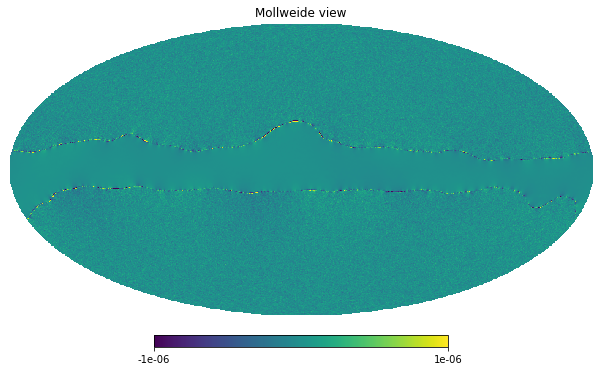

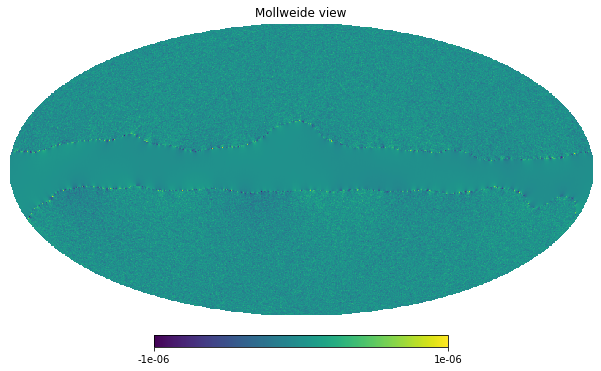

In [42]:
hp.mollview(fBmap,min=-1e-6,max=1e-6)
hp.mollview(fbmap,min=-1e-6,max=1e-6)

In [21]:
fEE = cs.utils.alm2cl(clpp.lmax,fElm)
fBB = cs.utils.alm2cl(clpp.lmax,fBlm)
fee = cs.utils.alm2cl(clpp.lmax,felm)
fbb = cs.utils.alm2cl(clpp.lmax,fblm)

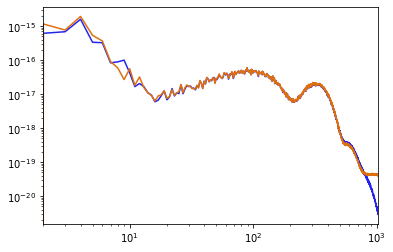

In [23]:
xlim(2,1024)
#ylim(5e15,2e17)
loglog(fEE)
loglog(fee)

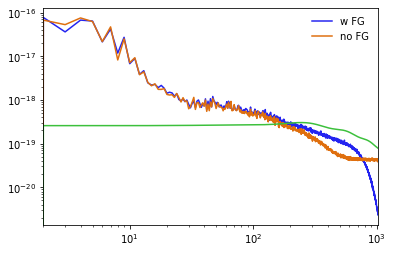

In [37]:
xlim(2,1024)
#ylim(5e15,2e17)
loglog(clpp.L,fBB,label='w FG')
loglog(clpp.L,fbb,label='no FG')
loglog(clpp.L,clpp.cl_len[2,:clpp.Lmax+1])
legend()

In [7]:
Elm, Blm = clpp.get_falm_sim(1,filt='')

In [22]:
elm, blm = pl.load(open(clpp.filt_dir+'/../CINV_noFG/cinv_sim_'+str(1).zfill(4)+'.pkl','rb'))

In [23]:
EE = cs.utils.alm2cl(clpp.lmax,Elm)
BB = cs.utils.alm2cl(clpp.lmax,Blm)
ee = cs.utils.alm2cl(clpp.lmax,elm)
bb = cs.utils.alm2cl(clpp.lmax,blm)

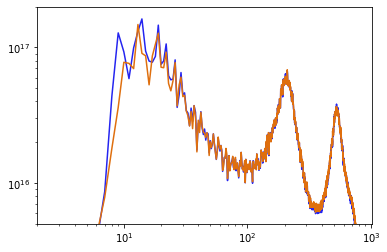

In [32]:
xlim(2,1024)
ylim(5e15,2e17)
loglog(EE)
loglog(ee)

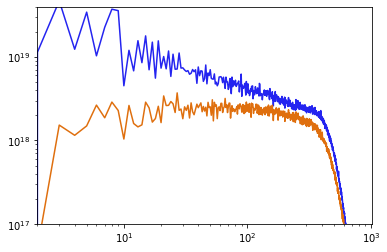

In [33]:
xlim(2,1024)
ylim(1e17,4e19)
loglog(BB)
loglog(bb)

In [49]:
Lfac = clpp.L*(clpp.L+1)/2.
Glm = Lfac[:,None]*pl.load(open(clpp.mass_dir+'/phi_sim_'+str(1).zfill(4)+'.pkl','rb'))
glm = Lfac[:,None]*pl.load(open(clpp.mass_dir+'/../MASS_noFG/phi_sim_'+str(1).zfill(4)+'.pkl','rb'))

In [63]:
MGlm = Lfac[:,None]*pl.load(open(os.path.join(clpp.mass_dir,f"MF_{hash_array(clpp.mf_array)}.pkl"),'rb'))
Mglm = Lfac[:,None]*pl.load(open(os.path.join(clpp.mass_dir+'/../MASS_noFG/',f"MF_{hash_array(clpp.mf_array)}.pkl"),'rb'))

In [64]:
MGmap = cs.utils.hp_alm2map(clpp.nside,clpp.Lmax,clpp.Lmax,MGlm)
Mgmap = cs.utils.hp_alm2map(clpp.nside,clpp.Lmax,clpp.Lmax,Mglm)

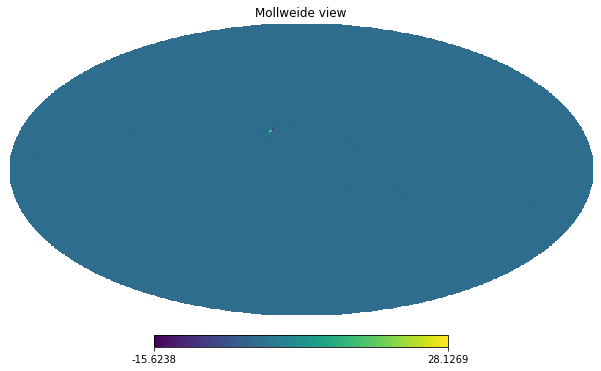

In [68]:
hp.mollview(MGmap)

In [65]:
Gmap = cs.utils.hp_alm2map(clpp.nside,clpp.Lmax,clpp.Lmax,Glm)
gmap = cs.utils.hp_alm2map(clpp.nside,clpp.Lmax,clpp.Lmax,glm)

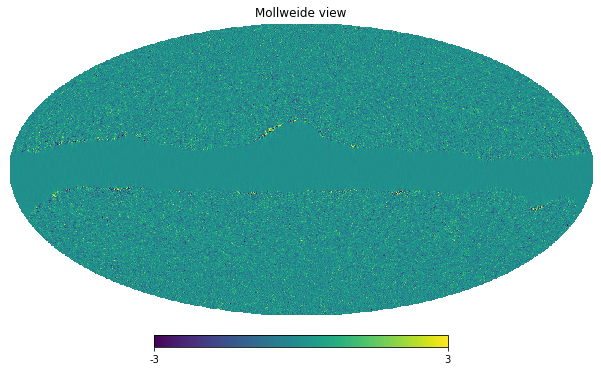

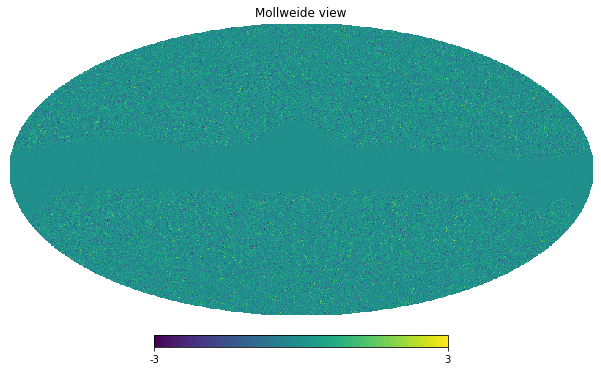

In [71]:
hp.mollview(Gmap-MGmap,min=-3,max=3)
hp.mollview(gmap-Mgmap,min=-3,max=3)

In [79]:
G60 = hp.ud_grade(hp.read_map('../../../../data/lensing/Masks/HFI_Mask_GalPlane-apo0_2048_R2.00.fits',field=2),clpp.nside)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/fitsfunc.py:426: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/fitsfunc.py:486: UserWarning: Ordering converted to RING
  warnings.warn("Ordering converted to RING")


In [101]:
fsky_g60 = np.average(G60)
print(fsky_g60)

0.600813110669454


In [103]:
nGmap = G60*(Gmap-MGmap)
ngmap = G60*(gmap-Mgmap)
nGlm = cs.utils.hp_map2alm(clpp.nside,clpp.Lmax,clpp.Lmax,nGmap)
nglm = cs.utils.hp_map2alm(clpp.nside,clpp.Lmax,clpp.Lmax,ngmap)
nGG = cs.utils.alm2cl(clpp.Lmax,nGlm)/fsky_g60
ngg = cs.utils.alm2cl(clpp.Lmax,nglm)/fsky_g60

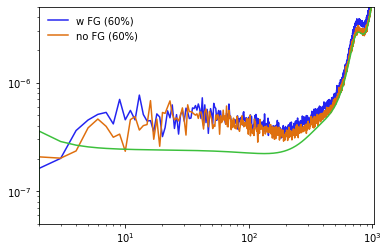

In [113]:
xlim(2,clpp.Lmax)
ylim(5e-8,5e-6)
loglog(clpp.L,nGG,label='w FG (60%)')
loglog(clpp.L,ngg,label='no FG (60%)')
loglog(clpp.L,Lfac**2*clpp.norm)
legend()

In [105]:
oGlm = cs.utils.hp_map2alm(clpp.nside,clpp.Lmax,clpp.Lmax,Gmap-MGmap)
oglm = cs.utils.hp_map2alm(clpp.nside,clpp.Lmax,clpp.Lmax,gmap-Mgmap)
oGG = cs.utils.alm2cl(clpp.Lmax,oGlm)/clpp.fsky
ogg = cs.utils.alm2cl(clpp.Lmax,oglm)/clpp.fsky

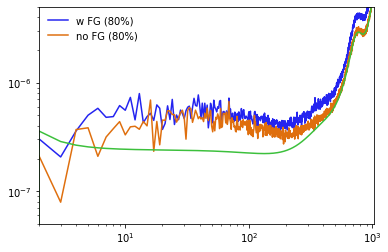

In [114]:
xlim(2,clpp.Lmax)
ylim(5e-8,5e-6)
loglog(clpp.L,oGG,label='w FG (80%)')
loglog(clpp.L,ogg,label='no FG (80%)')
loglog(clpp.L,Lfac**2*clpp.norm)
legend()

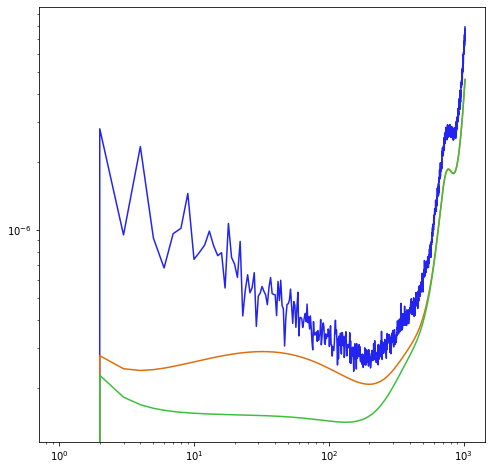

In [12]:
theory = clpp.cl_unl['pp'][:clpp.Lmax+1]
plt.figure(figsize=(8,8))
plt.loglog(clpp.L,clpp.Lfac*clpp.get_qcl_sim(1)/clpp.fsky)
plt.loglog(clpp.L,clpp.Lfac*(theory+clpp.norm))
plt.loglog(clpp.L,clpp.Lfac*(clpp.norm))

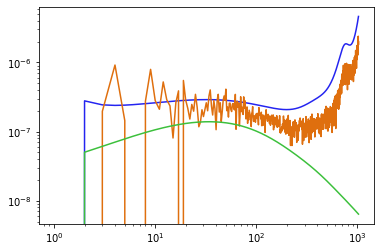

In [10]:
clpp.plot_qcl_sim(100)

../quest.py:262: RuntimeWarning: divide by zero encountered in true_divide
  fl = 2/(self.L * (self.L + 1))
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


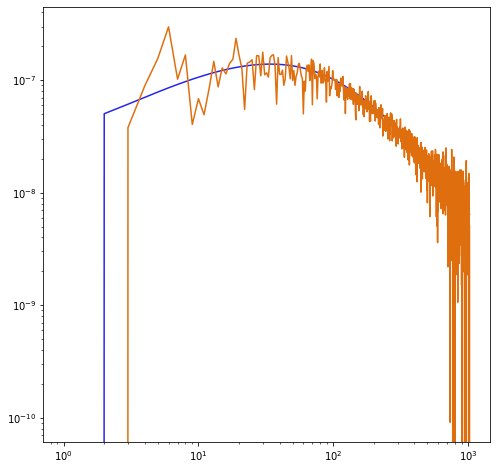

In [13]:
clpp.plot_inXout(10)